In [5]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
from sklearn.model_selection import train_test_split
import numpy as np 
import matplotlib.pyplot as plt 

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [19]:
X_NN = np.load("X_NN_case1.npy")
y_NN = np.load("y_NN_case1.npy")

#Normalize data 
X_NN_norm = X_NN.copy()
for i, x in enumerate(X_NN.T): 
    X_NN_norm[:, i] = (x.max() - X_NN_norm[:, i])/(x.max() - x.min())
    
y_NN_norm = y_NN.copy()
for i, y in enumerate(y_NN.T): 
    y_NN_norm[:, i] = (y.max() - y_NN_norm[:, i])/(y.max() - y.min())
    
X_train, X_test, y_train, y_test = train_test_split(X_NN, y_NN, test_size=0.2)

In [64]:
param_AI_0 = keras.Sequential([
    keras.Input(shape=(8,)),
    layers.Dense(1000, activation='relu', name="Layer1"), 
    layers.Dense(400, activation='relu', name="Layer2"), 
    layers.Dense(50, activation='relu', name="Layer3"),
    layers.Dense(6, name="Parameter_Guesses")
])
param_AI_0.summary()
param_AI_0.compile(optimizer='adam', loss='mse')


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Layer1 (Dense)               (None, 1000)              9000      
_________________________________________________________________
Layer2 (Dense)               (None, 400)               400400    
_________________________________________________________________
Layer3 (Dense)               (None, 50)                20050     
_________________________________________________________________
Parameter_Guesses (Dense)    (None, 6)                 306       
Total params: 429,756
Trainable params: 429,756
Non-trainable params: 0
_________________________________________________________________


In [69]:
hist = param_AI_0.fit(X_NN_norm, y_NN_norm, epochs=10)

Epoch 1/10
37500/37500 [==============================] - 130s 3ms/step - loss: 0.0177
Epoch 2/10
37500/37500 [==============================] - 127s 3ms/step - loss: 0.0173
Epoch 3/10
37500/37500 [==============================] - 125s 3ms/step - loss: 0.0170
Epoch 4/10
37500/37500 [==============================] - 131s 3ms/step - loss: 0.0167
Epoch 5/10
37500/37500 [==============================] - 131s 3ms/step - loss: 0.0164
Epoch 6/10
37500/37500 [==============================] - 131s 3ms/step - loss: 0.0161
Epoch 7/10
37500/37500 [==============================] - 125s 3ms/step - loss: 0.0159
Epoch 8/10
37500/37500 [==============================] - 124s 3ms/step - loss: 0.0156
Epoch 9/10
37500/37500 [==============================] - 128s 3ms/step - loss: 0.0155
Epoch 10/10
37500/37500 [==============================] - 130s 3ms/step - loss: 0.0153


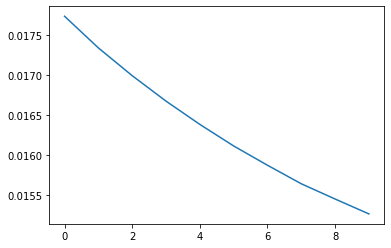

In [74]:
plt.plot(hist.history['loss'])

In [72]:
X_NN_test = np.load("X_NN_case1_test.npy")
y_NN_test = np.load("y_NN_case1_test.npy")

#Normalize data 
X_NN_norm_test = X_NN_test.copy()
for i, x in enumerate(X_NN.T): 
    X_NN_norm_test[:, i] = (x.max() - X_NN_norm_test[:, i])/(x.max() - x.min())
    
y_NN_norm_test = y_NN_test.copy()
for i, y in enumerate(y_NN.T): 
    y_NN_norm_test[:, i] = (y.max() - y_NN_norm_test[:, i])/(y.max() - y.min())

In [75]:
param_AI_0.evaluate(X_NN_norm_test, y_NN_norm_test)

3750/3750 [==============================] - 4s 1ms/step - loss: 0.0450


0.04500354453921318

In [80]:
predictions = param_AI_0.predict(X_NN_norm_test)

In [106]:
#Unnormalize data 
def unnormalize(X):
    X_new = []
    y_new = []
    for x, x_ in zip(X_NN.T, X): 
        X_new.append(x.max() - x_*(x.max() - x.min()))
        #y_new.append(y.max() - y*(y.max() - y.min()))
    return X_new

In [115]:
i = 20
pred = param_AI_0.predict(np.array([X_NN_norm_test[i]]))
print("Model predicts:{}".format(pred))
print("Actual answer = {}".format(y_NN_norm_test[i]))

Model predicts:[[0.48558357 0.17924714 0.21325742 0.5386102  0.5706489  0.54048264]]
Actual answer = [0.47466518 0.17798124 0.045661   0.57438871 0.55898084 0.74161272]


In [116]:
y_NN_norm_test

array([[0.47466518, 0.17798124, 0.045661  , 0.57438871, 0.55898084,
        0.74161272],
       [0.47466518, 0.17798124, 0.045661  , 0.57438871, 0.55898084,
        0.74161272],
       [0.47466518, 0.17798124, 0.045661  , 0.57438871, 0.55898084,
        0.74161272],
       ...,
       [0.75984802, 0.0016062 , 0.99765524, 0.47724288, 0.49345577,
        0.88118121],
       [0.75984802, 0.0016062 , 0.99765524, 0.47724288, 0.49345577,
        0.88118121],
       [0.47466518, 0.17798124, 0.045661  , 0.57438871, 0.55898084,
        0.74161272]])